### Experiments(Discrete Features)

X_1,X_2 are related dependent variables

#### Submodularity Test
$f(X \cup \{x\})-f(X)\geq f(Y \cup \{x\})-f(Y)\quad \text{if } X\subseteq Y\quad x\in \Omega \setminus Y$

In [97]:
# Data generation
# Xi ~ Ber(n,pi)

probs = np.array([0.5,0.4,0.6,0.4,0.7,0.3])
n = 10**5
s = 0
f = 0
for i,k in enumerate(itertools.product([0,1],repeat=len(probs))):
    l = np.prod(probs**np.array(k))*np.prod((1-probs)**(1-np.array(k)))*n+1e-6
    f+=l
    l = int(l)
    s+=l
    if i==0:X = np.tile(np.array(k),(l,1))
    else:X = np.vstack([X,np.tile(np.array(k),(l,1))])
print X.shape
X = X[np.random.permutation(n)]

beta = np.random.randn(4,2)*2
y = np.zeros(n)
for i in range(n):
    if X[i][0]==0:
        if X[i][1]==0: y[i] = sum(beta[0][:2]*X[i][:2])+beta[0][1]
        else: y[i] = sum(beta[1][:2]*X[i][:2])+beta[1][1]
    else:
        if X[i][1]==0: y[i] = sum(beta[2][:2]*X[i][:2])+beta[2][1]
        else: y[i] = sum(beta[3][:2]**X[i][:2])+beta[3][1]
# add noise e~N(0,0.5^2)
y = y+np.random.randn(n)*0.5
train_X = X#[:int(n*0.8)]
test_X = X#[int(n*0.8):]
train_y = y#[:int(n*0.8)]
test_y = y#[int(n*0.8):]


(100000, 6)


In [100]:
violation = False
for i in range(1,4):
    s_y = list(itertools.combinations(np.arange(6),i+2))
    for s in s_y:
        s_x = list(itertools.combinations(s,i+1))
        comp = set(np.arange(6)).difference(set(s))
        for sub_s_x in s_x:
            for c in comp:
                s = set(s)
                sub_s_x = set(sub_s_x )
                print 'X = {}; Y={}; x = {}'.format(sub_s_x,s,c)
                train_err1 = lr(s,train_X,train_y,test_X,test_y)[0]
                train_err2 = lr(sub_s_x,train_X,train_y,test_X,test_y)[0]
                s.add(c)
                sub_s_x.add(c)
                print train_err1 - lr(s,train_X,train_y,test_X,test_y)[0],\
                  train_err2 - lr(sub_s_x,train_X,train_y,test_X,test_y)[0]
                if train_err1 - lr(s,train_X,train_y,test_X,test_y)[0]<train_err2 - lr(sub_s_x,train_X,train_y,test_X,test_y)[0]:
                    violation = True
                s.remove(c)
                sub_s_x.remove(c)
print violation

X = set([0, 1]); Y=set([0, 1, 2]); x = 3
1.77227286642e-05 1.07187107628e-05
X = set([0, 1]); Y=set([0, 1, 2]); x = 4
2.50321215367e-05 8.44258762428e-06
X = set([0, 1]); Y=set([0, 1, 2]); x = 5
2.4126521731e-05 1.21951469684e-05
X = set([0, 2]); Y=set([0, 1, 2]); x = 3
1.77227286642e-05 8.76982397813e-06
X = set([0, 2]); Y=set([0, 1, 2]); x = 4
2.50321215367e-05 1.12869301869e-05
X = set([0, 2]); Y=set([0, 1, 2]); x = 5
2.4126521731e-05 1.58195725697e-05
X = set([1, 2]); Y=set([0, 1, 2]); x = 3
1.77227286642e-05 1.34333431259e-05
X = set([1, 2]); Y=set([0, 1, 2]); x = 4
2.50321215367e-05 1.53280289686e-05
X = set([1, 2]); Y=set([0, 1, 2]); x = 5
2.4126521731e-05 1.92385515623e-05
X = set([0, 1]); Y=set([0, 1, 3]); x = 2
9.6910694545e-06 2.68705155312e-06
X = set([0, 1]); Y=set([0, 1, 3]); x = 4
1.61124652249e-05 8.44258762428e-06
X = set([0, 1]); Y=set([0, 1, 3]); x = 5
3.47493938125e-05 1.21951469684e-05
X = set([0, 3]); Y=set([0, 1, 3]); x = 2
9.6910694545e-06 1.13231416154e-06
X = 

X = set([1, 2]); Y=set([1, 2, 5]); x = 4
2.82074527016e-05 1.53280289686e-05
X = set([1, 5]); Y=set([1, 2, 5]); x = 0
0.0325191355761 0.032513024604
X = set([1, 5]); Y=set([1, 2, 5]); x = 3
2.99596008415e-05 1.8669147718e-05
X = set([1, 5]); Y=set([1, 2, 5]); x = 4
2.82074527016e-05 1.87151240016e-05
X = set([2, 5]); Y=set([1, 2, 5]); x = 0
0.0325191355761 0.0158546259089
X = set([2, 5]); Y=set([1, 2, 5]); x = 3
2.99596008415e-05 2.3780254879e-05
X = set([2, 5]); Y=set([1, 2, 5]); x = 4
2.82074527016e-05 2.23396102421e-05
X = set([1, 3]); Y=set([1, 3, 4]); x = 0
0.0325180014448 0.0325146554267
X = set([1, 3]); Y=set([1, 3, 4]); x = 2
2.48221186727e-05 5.80950476664e-06
X = set([1, 3]); Y=set([1, 3, 4]); x = 5
4.05586190254e-05 2.17764066656e-05
X = set([1, 4]); Y=set([1, 3, 4]); x = 0
0.0325180014448 0.0325147644757
X = set([1, 4]); Y=set([1, 3, 4]); x = 2
2.48221186727e-05 1.00893626956e-05
X = set([1, 4]); Y=set([1, 3, 4]); x = 5
4.05586190254e-05 2.42075550355e-05
X = set([3, 4]); Y

X = set([0, 3, 5]); Y=set([0, 1, 3, 5]); x = 4
5.19178481797e-05 3.63058294615e-05
X = set([1, 3, 5]); Y=set([0, 1, 3, 5]); x = 2
4.20962329439e-05 1.97979073789e-05
X = set([1, 3, 5]); Y=set([0, 1, 3, 5]); x = 4
5.19178481797e-05 3.15486595756e-05
X = set([0, 1, 4]); Y=set([0, 1, 4, 5]); x = 2
3.34027603569e-05 1.92765854656e-05
X = set([0, 1, 4]); Y=set([0, 1, 4, 5]); x = 3
5.08820938667e-05 1.83885883634e-05
X = set([0, 1, 5]); Y=set([0, 1, 4, 5]); x = 2
3.34027603569e-05 1.46184263158e-05
X = set([0, 1, 5]); Y=set([0, 1, 4, 5]); x = 3
5.08820938667e-05 3.32729576069e-05
X = set([0, 4, 5]); Y=set([0, 1, 4, 5]); x = 2
3.34027603569e-05 1.36031658848e-05
X = set([0, 4, 5]); Y=set([0, 1, 4, 5]); x = 3
5.08820938667e-05 3.37075681518e-05
X = set([1, 4, 5]); Y=set([0, 1, 4, 5]); x = 2
3.34027603569e-05 1.79997829554e-05
X = set([1, 4, 5]); Y=set([0, 1, 4, 5]); x = 3
5.08820938667e-05 3.1502683292e-05
X = set([0, 2, 3]); Y=set([0, 2, 3, 4]); x = 1
2.1182803269 2.11825994497
X = set([0, 2,

7.50153251457e-05 3.35014480202e-05
X = set([1, 3, 4, 5]); Y=set([0, 1, 3, 4, 5]); x = 2
7.50153251457e-05 4.06884386003e-05
X = set([0, 2, 3, 4]); Y=set([0, 2, 3, 4, 5]); x = 1
2.11831907694 2.1182803269
X = set([0, 2, 3, 5]); Y=set([0, 2, 3, 4, 5]); x = 1
2.11831907694 2.11828463771
X = set([0, 2, 4, 5]); Y=set([0, 2, 3, 4, 5]); x = 1
2.11831907694 2.11828018813
X = set([0, 3, 4, 5]); Y=set([0, 2, 3, 4, 5]); x = 1
2.11831907694 2.11827756306
X = set([2, 3, 4, 5]); Y=set([0, 2, 3, 4, 5]); x = 1
2.11831907694 2.10161758365
X = set([1, 2, 3, 4]); Y=set([1, 2, 3, 4, 5]); x = 0
0.032582324489 0.0325305708438
X = set([1, 2, 3, 5]); Y=set([1, 2, 3, 4, 5]); x = 0
0.032582324489 0.0325499267395
X = set([1, 2, 4, 5]); Y=set([1, 2, 3, 4, 5]); x = 0
0.032582324489 0.0325440211693
X = set([1, 3, 4, 5]); Y=set([1, 2, 3, 4, 5]); x = 0
0.032582324489 0.0325479976025
X = set([2, 3, 4, 5]); Y=set([1, 2, 3, 4, 5]); x = 0
0.032582324489 0.0158808312044
False


#### Greedy Algorithm

In [21]:
# Data generation
# Xi ~ Ber(n,pi)
probs = [0.4,0.6,0.4,0.6,0.4,0.6]
n = 1000
X = np.zeros((n,6))
for i,p in enumerate(probs):
    X[:,i]=np.array([np.random.binomial(1,p) for j in range(n)])
beta = np.random.randn(4,2)*2
y = np.zeros(n)
for i in range(n):
    if X[i][0]==0:
        if X[i][1]==0: y[i] = sum(beta[0][:2]*X[i][:2])+beta[0][1]
        else: y[i] = sum(beta[1][:2]*X[i][:2])+beta[1][1]
    else:
        if X[i][1]==0: y[i] = sum(beta[2][:2]*X[i][:2])+beta[2][1]
        else: y[i] = sum(beta[3][:2]**X[i][:2])+beta[3][1]
# add noise e~N(0,0.5^2)
y = y+np.random.randn(n)*0.5
train_X = X[:int(n*0.8)]
test_X = X[int(n*0.8):]
train_y = y[:int(n*0.8)]
test_y = y[int(n*0.8):]

In [22]:
# fit linear regression with given features 
def lr(features,train_X,train_y,test_X,test_y):
    features = np.array(list(features))
    n_feature =len(features)
    train_err = 0.0
    test_err = 0.0
    train_vector =np.sum(train_X[:,features]* np.array([2**i for i in range(n_feature)]),axis=1)
    test_vector =np.sum(test_X[:,features]* np.array([2**i for i in range(n_feature)]),axis=1)
    for v in range(2**n_feature):
        train_idx = np.where(train_vector==v)[0]
        test_idx = np.where(test_vector==v)[0]
        train_err += np.sum((np.mean(train_y[train_idx])-train_y[train_idx])**2)
        if len(test_idx)!=0:
            test_err += np.sum((np.mean(test_y[test_idx])-test_y[test_idx])**2)
    return train_err/len(train_y),test_err/len(test_y)

0.204108861714 0.235144491158
[  1.26665977e+00   9.91998232e+00   7.73813715e-03   1.21110252e-02
   9.89273462e-03   1.22514883e-02]


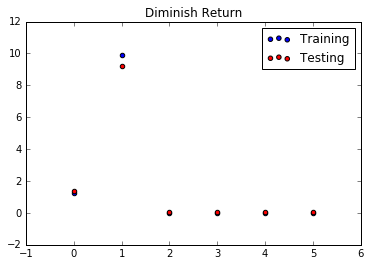

In [33]:
train_r = np.zeros(6)
test_r = np.zeros(6)
feature_set = set(np.arange(6))
train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
print train_err,test_err
for i,s in enumerate(feature_set):
    feature_set.remove(s)
    train_err1,test_err1=lr(feature_set,train_X,train_y,test_X,test_y)
    train_r[i] = train_err1-train_err
    test_r[i] = test_err1-test_err
    feature_set.add(s)
print train_r
plt.scatter(np.arange(6),train_r,label='Training')
plt.scatter(np.arange(6),test_r,label = 'Testing',c = 'red')
plt.title('Diminish Return')
plt.legend()
plt.show()

#### Remove feature according to the diminish return

0.204108861714 0.235144491158


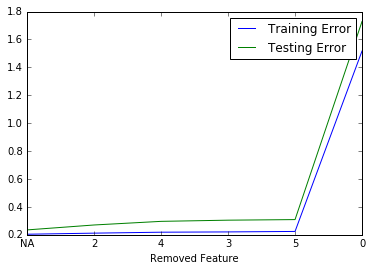

In [39]:
rm_order = np.argsort(train_r)
lr_train_err = np.zeros(6)
lr_test_err = np.zeros(6)
feature_set = set(np.arange(6))
train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
print train_err,test_err
lr_train_err[0] = train_err
lr_test_err[0] = test_err
for i,s in enumerate(rm_order[:-1]):
    feature_set.remove(s)
    train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
    lr_train_err[i+1] = train_err 
    lr_test_err[i+1] = test_err
plt.plot(np.arange(6),lr_train_err,label='Training Error')
plt.plot(np.arange(6),lr_test_err,label = 'Testing Error')
plt.xticks(np.arange(6),np.hstack(['NA',rm_order]))
plt.xlabel('Removed Feature')
plt.legend()
plt.show()

#### Lasso

In [40]:
def inter_terms(n,X):
    inds = list(itertools.product([0,1],repeat=n))
    ind_term = np.array(['X'+str(i+1) for i in range(6)])
    terms = []
    for i in inds:
        terms.append(''.join(ind_term[np.nonzero(np.array(i))[0]]))    
        Xprod = np.prod(X[:,np.nonzero(np.array(i))[0]],axis=1)
        X = np.hstack([X,Xprod.reshape(-1,1)])
    return X,terms[1:]
train_X,terms = inter_terms(6,train_X)
test_X,terms = inter_terms(6,test_X)

In [41]:
alphas = np.linspace(0.01,0.5,10)
train_err = []
test_err = []
coeffs = []
for a in alphas:
    model = linear_model.Lasso(alpha=a)
    model.fit(train_X,train_y)
    train_err.append(np.mean((model.predict(train_X)-train_y)**2))
    test_err.append(np.mean((model.predict(test_X)-test_y)**2))    
    coeffs.append(model.coef_)

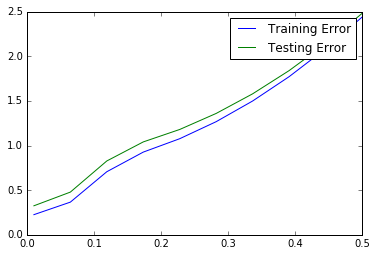

In [42]:
plt.plot(alphas,train_err,label = 'Training Error')
plt.plot(alphas,test_err,label='Testing Error')
plt.legend()
plt.show()

In [43]:
terms = np.array(terms)
for coeff in coeffs:
    print terms[np.nonzero(coeff)[0]]

['X6' 'X5' 'X1X4X5X6' 'X1X3' 'X1X3X5' 'X1X3X5X6' 'X1X2X4X5X6']
['X6' 'X5' 'X1X4X5X6' 'X1X2X4X5X6']
['X6' 'X5' 'X2X4X5X6' 'X1X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X2X4X5X6' 'X1X2X4X5X6']
['X5' 'X1X2X4X5X6']
